# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge = pd.merge(study_results, mouse_metadata, how='left', on= 'Mouse ID')

# Display the data table for preview
merge.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice. using nunique()
num_mice = merge['Mouse ID'].nunique()
num_mice

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = merge[merge.duplicated()== True]
dup_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
total_dup_mice_ID = merge[merge['Mouse ID']=='g989']
total_dup_mice_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge.drop(index = [107,137,329,360,620,681,815,869,950,1111,1195,1380,1592])
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [21]:
# Checking the number of mice in the clean DataFrame.
num_mice_nodup = clean_df['Mouse ID'].nunique()
num_mice_nodup

248

## Summary Statistics

In [26]:
#create single dataframes that contain stats for single drugs 
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = merge.groupby('Drug Regimen')
tumor_mean = summary_stats['Tumor Volume (mm3)'].mean().round(2)
tumor_median = summary_stats['Tumor Volume (mm3)'].median().round(2)
tumor_var = summary_stats['Tumor Volume (mm3)'].var().round(2)
tumor_std = summary_stats['Tumor Volume (mm3)'].std().round(2)
tumor_sem = summary_stats['Tumor Volume (mm3)'].sem().round(2)

#combine all data into one dataframe again
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stats_drug = pd.concat([tumor_mean,tumor_median, tumor_var, tumor_std, tumor_sem],axis=1)
summary_stats_drug['Mean Tumor Volume'] = tumor_mean
summary_stats_drug['Median Tumor Volume'] = tumor_median
summary_stats_drug['Variance Tumor Volume'] = tumor_var
summary_stats_drug['Standard Dev Tumor Volume'] = tumor_std
summary_stats_drug['SEM Tumor Volume'] = tumor_sem

summary_stats_drug_complete = summary_stats_drug.drop(['Tumor Volume (mm3)'], axis = 1)
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats_drug_complete

#longwinded way of doing this but it was the easiest way for me to rename the columns that I knew

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Dev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen


#Summary Statistics table in cell above


# Using the aggregation method, produce the same summary statistics in a single line.


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

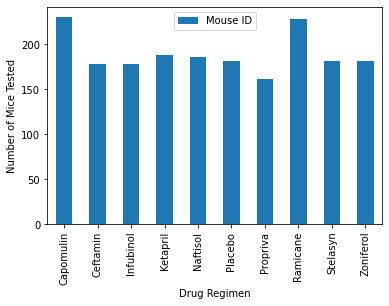

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#using count because it will take in all data entries
barplot_df = merge.groupby(['Drug Regimen']).count()

#we only need the number of mice so we drop all other columns
barplot_df = barplot_df.drop(columns = ['Timepoint','Tumor Volume (mm3)','Metastatic Sites','Sex','Age_months', 'Weight (g)'])

barplot_df.plot.bar()
plt.ylabel('Number of Mice Tested')

Text(0.5, 1.0, 'Count of Mice per Drug Regimen')

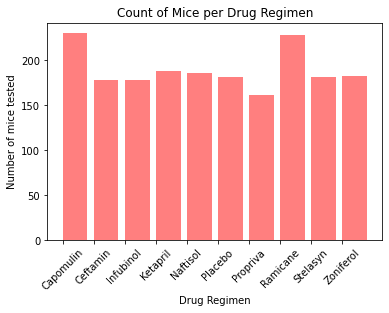

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_label = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol', 'Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
plt.bar(x_label, barplot_df['Mouse ID'], alpha = 0.5, color = 'red', align = 'edge')
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of mice tested')
plt.title('Count of Mice per Drug Regimen')

#essentially did the same thing as the cell above just using matplotlib

array([<AxesSubplot:ylabel='Sex'>], dtype=object)

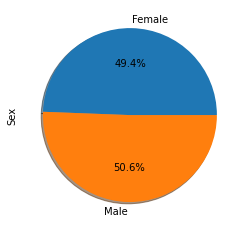

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pieplot_df = merge.groupby(['Sex']).count()

#only take a portion of the dataframe, the other values are not needed
pieplot_df_sex = pieplot_df[['Mouse ID']]
pieplot_df

Pandas_Pie = pieplot_df_sex.plot.pie(ylabel = 'Sex',subplots = True, legend = 0, labeldistance = 1.1, 
                                     autopct="%1.1f%%", shadow = True)
Pandas_Pie


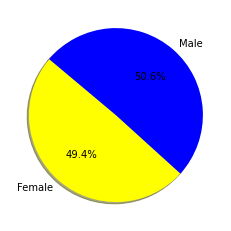

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
colors = ['yellow', 'blue']
data = pieplot_df_sex

data = data['Mouse ID'].tolist()
Matplot_Pie = plt.pie(data,colors = colors, labels = labels,
       autopct="%1.1f%%", shadow=True, startangle=140)
#again, essentially the same thing was done using matplotlib instead of pandas. 
#I played around with some color and stuff but the data is the same

## Quartiles, Outliers and Boxplots

In [75]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#takes every mouse that was recorded at the 45 day mark and makes its own 'finished df'
final_tumor_volume = clean_df.loc[clean_df['Timepoint'] == 45]



# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timeframe

In [96]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
capo_vol = []
rami_vol = []
infu_vol = []
ceft_vol = []

for value in final_tumor_volume['Drug Regimen']:
    if value == 'Capomulin':
        capo_vol.append(final_tumor_volume['Tumor Volume (mm3)'])
    elif value == 'Ramicane':
        rami_vol.append(final_tumor_volume['Tumor Volume (mm3)'])
    elif value == 'Infubinol':
        infu_vol.append(final_tumor_volume['Tumor Volume (mm3)'])
    elif value == 'Ceftamin':
        ceft_vol.append(final_tumor_volume['Tumor Volume (mm3)'])
    else:
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_tumor_volume_capomulin = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Capomulin']
sns.boxplot(x = final_tumor_volume['Drug Regimen'],y= final_tumor_volume['Tumor Volume (mm3)'], orient = 'v')
    # Locate the rows which contain mice on each drug and get the tumor volumes


#I cant figure out how to only get the first 4 drugs, I can produce IQR for all but not specifics

IndentationError: expected an indented block (Temp/ipykernel_11632/3444591067.py, line 23)

<AxesSubplot:xlabel='Drug Regimen', ylabel='Tumor Volume (mm3)'>

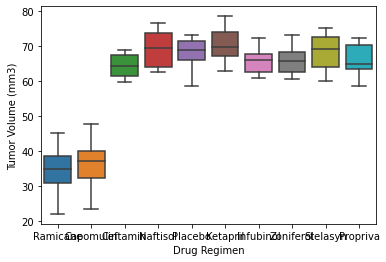

In [97]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
final_tumor_volume_capomulin = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Capomulin']
sns.boxplot(x = final_tumor_volume['Drug Regimen'],y= final_tumor_volume['Tumor Volume (mm3)'], orient = 'v')
#can't figure this out

## Line and Scatter Plots

<AxesSubplot:title={'center':'Single Mouse Data (b128 - Capomulin)'}, xlabel='Timepoint', ylabel='Volume'>

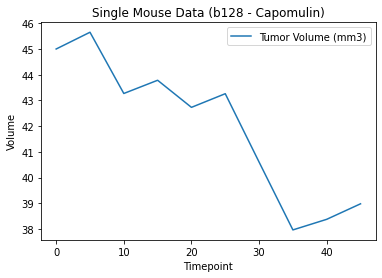

In [98]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# locate a specific mouse ID
solo_mouse = clean_df.loc[clean_df['Mouse ID'] == 'b128']


solo_mouse = solo_mouse[['Tumor Volume (mm3)','Timepoint']]


single_mouse_test = solo_mouse.plot.line(x = 'Timepoint', y = 'Tumor Volume (mm3)', ylabel = 'Volume', title = 'Single Mouse Data (b128 - Capomulin)')
single_mouse_test


<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

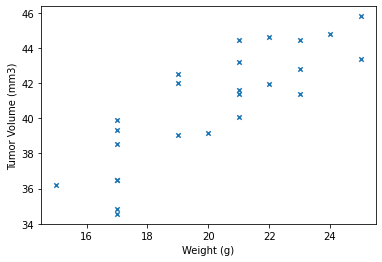

In [52]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
scatter_df = scatter_df.groupby('Mouse ID').mean()
x_val = scatter_df['Weight (g)'].tolist()
y_val = scatter_df['Tumor Volume (mm3)'].tolist()

scatter = scatter_df.plot.scatter(x = 'Weight (g)',
                                  y='Tumor Volume (mm3)',
                                  marker = 'x',
                                  facecolors = 'blue',                                  
                                  alpha = 1)

scatter


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


C:\Users\jfran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


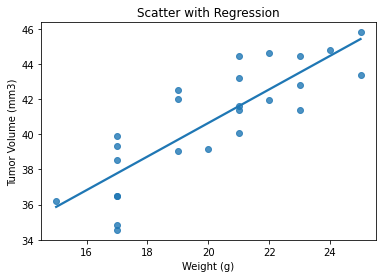

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#take the data and use scipy to check for pearson r coefficient
r,p = st.pearsonr(x_val, y_val)

#make the number easier to read
r = r.round(2)

#use seaborn to put the regresion line ontop of the chart I have created

chart_w_regression = sns.regplot(x_val, y_val, ci=None)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Scatter with Regression')

chart_w_regression
print(f'The correlation between mouse weight and the average tumor volume is {r}')


In [95]:
capo_vol

[1763    31.095335
 1764    38.982878
 1765    59.851956
 1766    64.729837
 1767    68.594745
           ...    
 1888    41.581521
 1889    31.023923
 1890    61.433892
 1891    58.634971
 1892    72.555239
 Name: Tumor Volume (mm3), Length: 130, dtype: float64,
 1763    31.095335
 1764    38.982878
 1765    59.851956
 1766    64.729837
 1767    68.594745
           ...    
 1888    41.581521
 1889    31.023923
 1890    61.433892
 1891    58.634971
 1892    72.555239
 Name: Tumor Volume (mm3), Length: 130, dtype: float64,
 1763    31.095335
 1764    38.982878
 1765    59.851956
 1766    64.729837
 1767    68.594745
           ...    
 1888    41.581521
 1889    31.023923
 1890    61.433892
 1891    58.634971
 1892    72.555239
 Name: Tumor Volume (mm3), Length: 130, dtype: float64,
 1763    31.095335
 1764    38.982878
 1765    59.851956
 1766    64.729837
 1767    68.594745
           ...    
 1888    41.581521
 1889    31.023923
 1890    61.433892
 1891    58.634971
 1892    72.555